# Concatenated Simulations

MobsPy allows for combining simulations to execute them sequentially. In combined simulations, the results from the precedent simulations are used for the following ones. It is done by passing the amount of the meta-species of the previous simulation into equally named meta-species in the next simulation.  

From the user's perspective, to create a combined simulation, one must define several simulational objects, each with its model, and sum the simulational objects. 

Here, we supply an example where, in the first simulation, species A grows according to a rate. Afterward, A stops growing, and it must compete with species B.

Compiling model
Compiling model
Starting Simulator
Simulation is Over


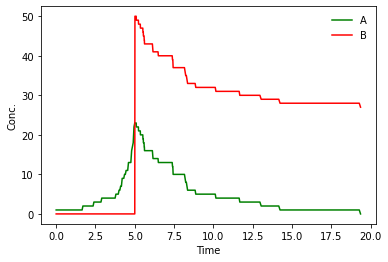

In [1]:
from mobspy import *

A = BaseSpecies()

A >> 2*A [1]

A(1)
S1 = Simulation(A)
S1.duration = 5
S1.method = 'stochastic'

A.reset_reactions()
B = BaseSpecies()

A + B >> Zero [0.01]

B(50)
S2 = Simulation (A | B)
S2.duration = (A <= 0) | (B <= 0)
S2.method = 'stochastic'

S = S1 + S2
S.run()

For events in concatenated simulations, the event time is based on each simulation individually and not the global time. Each new simulation starts counting from zero again when considering the event trigger time. 

Compiling model
Compiling model
Starting Simulator
Simulation is Over


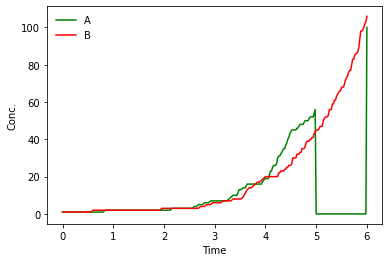

In [2]:
from mobspy import *

A, B = BaseSpecies()

A >> 2*A [1]
B >> 2*B [1]

A(1), B(1)
S1 = Simulation(A | B)
S1.duration = 4
S1.method = 'stochastic'

# This overrides the value of B from S1
B(0)
S2 = Simulation (A | B)
S2.duration = 2
S2.method = 'stochastic'

# The event will trigger at time 5 when S2 time is equal to 1
with S2.event_time(1):
    A(0)

# The event will not trigger as the duration of S2 is equal to 2
with S2.event_time(2):
    A(100)

S = S1 + S2
S.run()

## Concatenated Simulation Configuration


Setting up parameters is different when dealing with concatenated simulations. Some parameters can be set with the concatenated simulation objects, while others must be set individually or broadcast to the simulation objects.

The 'duration' parameter must be set individually for each simulation through its simulation object or with a list of durations for each simulation in the concatenated object. 
Both 'volume' and 'method' can be set individually or with a list in the concatenated objects for each simulation to construct hybrid simulations. However,  when set with an individual value (int, str, unit) on the concatenated simulation, the concatenated simulation will broadcast this parameter through all simulations, using the same for all. 
Finally, 'level', 'rate_type', 'plot_type', and 'repetitions' are broadcasted through all simulation objects when set through the concatenated object. 